In [1]:
from pathlib import Path
import spectral
import spectral.io.envi as envi

In [2]:
path = "data/mango_day_1_m3_01_back"
img_1 = envi.open(f"{path}.hdr", image=f"{path}.bin")

path = "data/mango_day_12_m3_14_back"
img_12 = envi.open(f"{path}.hdr", image=f"{path}.bin")

/Users/jakubdulas/Documents/Studia/AOC/FruitsClassificationFromHipespectralImages/.venv/lib/python3.12/site-packages/spectral/graphics/spypylab.py:796: UserWarning: Failed to create RectangleSelector object. Interactive pixel class labeling will be unavailable.
  warnings.warn(msg)


ImageView object:
  Display bands       :  (9, 19, 29)
  Interpolation       :  <default>
  RGB data limits     :
    R: [np.float64(-0.028184229508042336), np.float64(0.20787566900253296)]
    G: [np.float64(-0.0072063300758600235), np.float64(0.12459982931613922)]
    B: [np.float64(-0.004996867850422859), np.float64(0.09914732724428177)]

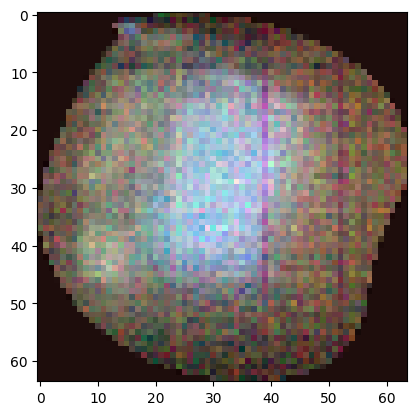

In [3]:
from spectral import imshow, get_rgb

imshow(img_1, bands=(9, 19, 29))

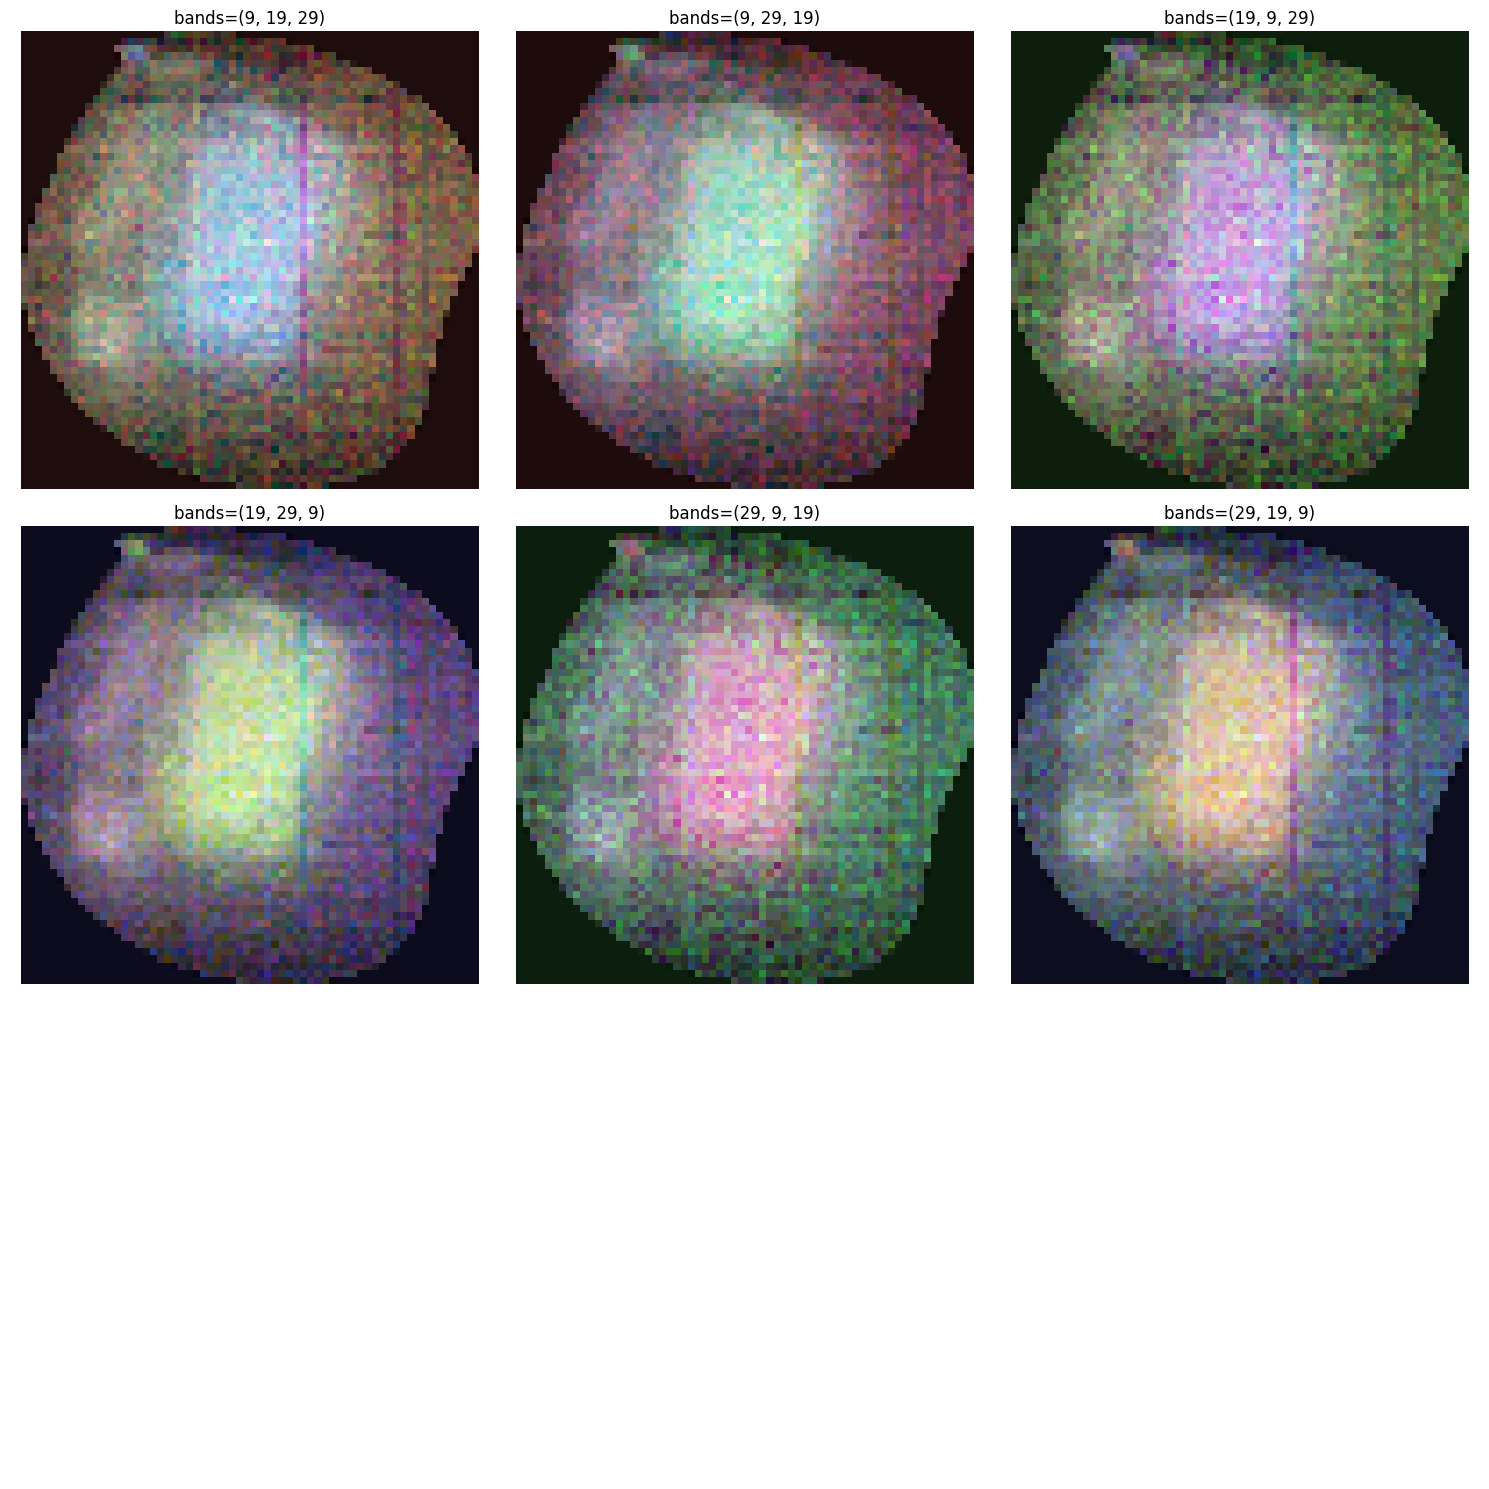

In [ ]:
import matplotlib.pyplot as plt
from itertools import permutations
import numpy as np

# # Oryginalne indeksy kanałów
img_1 = img_1.asarray()
bands = (9, 19, 29)

# Generowanie wszystkich permutacji kanałów
band_permutations = list(permutations(bands))

# Liczba permutacji i układ siatki
num_permutations = len(band_permutations)
grid_size = int(np.ceil(num_permutations**0.5))  # Rozmiar siatki

# Tworzenie figury
fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
axes = axes.flatten()

# Wyświetlanie obrazów dla każdej permutacji kanałów
for i, perm in enumerate(band_permutations):
    ax = axes[i]

    # Wybieramy odpowiednie kanały z obrazu i tworzymy RGB
    img_rgb = get_rgb(img_1, perm)
    # Wyświetlenie obrazu z danymi kanałami
    ax.imshow(img_rgb)
    ax.set_title(f"bands={perm}")
    ax.axis("off")  # Ukrycie osi

# Ukrycie pozostałych subplots, jeśli istnieją
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

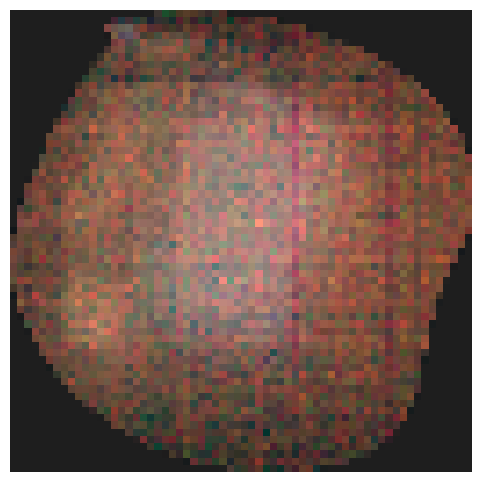

In [ ]:
img_rgb = np.stack([img_1[..., band] for band in bands], axis=-1)

# Normalizacja do zakresu [0, 1] dla poprawnego wyświetlania
img_rgb = (img_rgb - img_rgb.min()) / (img_rgb.max() - img_rgb.min())

# Wyświetlanie obrazu
plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)
plt.axis("off")
plt.show()

/Users/jakubdulas/Documents/Studia/AOC/FruitsClassificationFromHipespectralImages/.venv/lib/python3.12/site-packages/spectral/graphics/spypylab.py:796: UserWarning: Failed to create RectangleSelector object. Interactive pixel class labeling will be unavailable.
  warnings.warn(msg)


ImageView object:
  Display bands       :  [0, 112.0, 223]
  Interpolation       :  <default>
  RGB data limits     :
    R: [np.float64(-0.05103709548711777), np.float64(0.44330891966819763)]
    G: [np.float64(-0.006623237393796444), np.float64(0.31127849221229553)]
    B: [np.float64(-0.016016412526369095), np.float64(0.6931084394454956)]

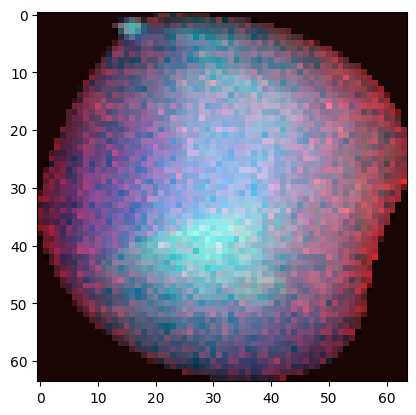

In [8]:
spectral.imshow(img_1)

ImageView object:
  Display bands       :  [0, 112, 223]
  Interpolation       :  <default>
  RGB data limits     :
    R: [np.float64(-0.07986552268266678), np.float64(0.42770636081695557)]
    G: [np.float64(-0.008525395765900612), np.float64(0.38907209038734436)]
    B: [np.float64(-0.01426206436008215), np.float64(0.5474871397018433)]

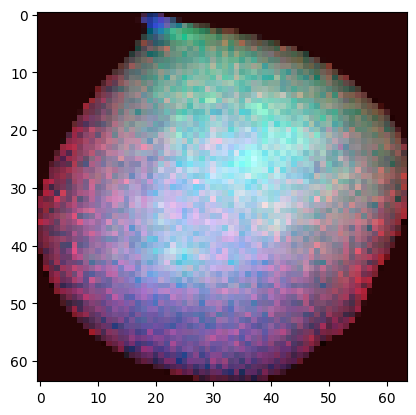

In [9]:
spectral.imshow(img_12)

In [10]:
img_1.shape

(64, 64, 224)

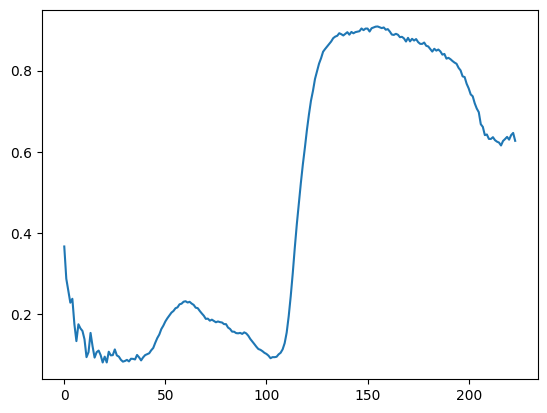

In [11]:
import matplotlib.pyplot as plt

pixel_spectrum = img_1[34, 32]

plt.plot(pixel_spectrum)
plt.show()

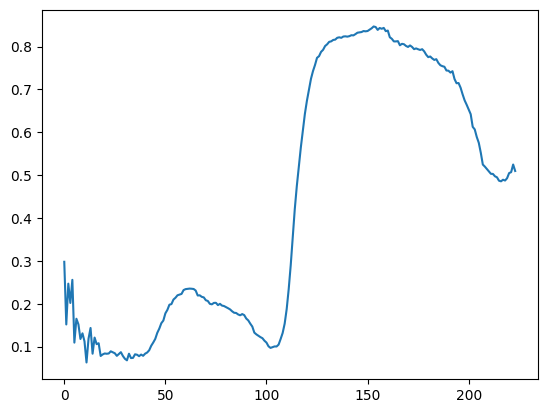

In [12]:
import matplotlib.pyplot as plt

pixel_spectrum = img_12[34, 32]

plt.plot(pixel_spectrum)
plt.show()

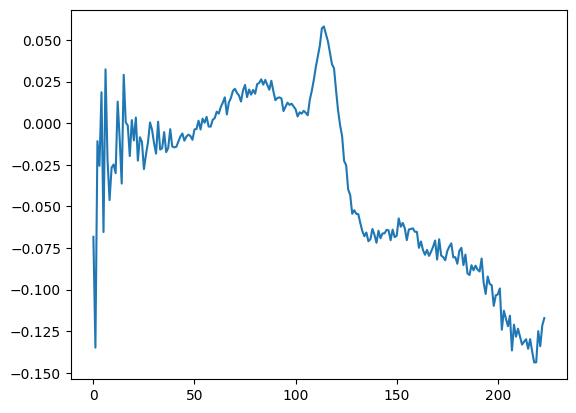

In [13]:
import matplotlib.pyplot as plt

pixel_spectrum = img_12[34, 32] - img_1[34, 32]

plt.plot(pixel_spectrum)
plt.show()

In [14]:
img_1.metadata

AttributeError: 'memmap' object has no attribute 'metadata'

ImageView object:
  Display bands       :  (29, 19, 9)
  Interpolation       :  <default>
  RGB data limits     :
    R: [np.float64(-0.004996867850422859), np.float64(0.09914732724428177)]
    G: [np.float64(-0.0072063300758600235), np.float64(0.12459982931613922)]
    B: [np.float64(-0.028184229508042336), np.float64(0.20787566900253296)]

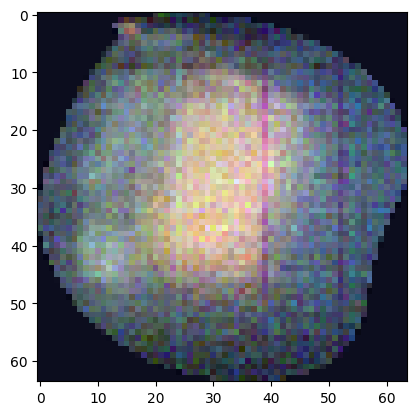

In [15]:
from spectral import imshow

imshow(img_1, bands=(29, 19, 9))

ImageView object:
  Display bands       :  (80, 50, 30)
  Interpolation       :  <default>
  RGB data limits     :
    R: [np.float64(-0.0061897519044578075), np.float64(0.2650240957736969)]
    G: [np.float64(-0.005119919776916504), np.float64(0.21199151873588562)]
    B: [np.float64(-0.003479777602478862), np.float64(0.09622306376695633)]

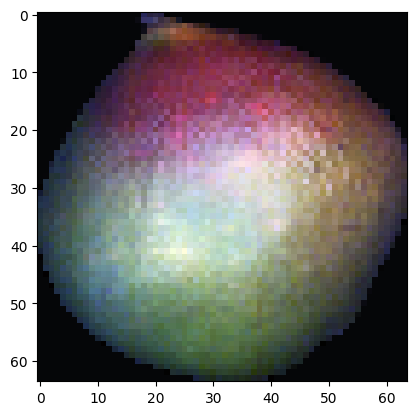

In [16]:
from spectral import imshow

imshow(img_12, bands=(80, 50, 30))

ImageView object:
  Display bands       :  (150, 80, 30)
  Interpolation       :  <default>
  RGB data limits     :
    R: [np.float64(-0.019060418009757996), np.float64(0.8749995827674866)]
    G: [np.float64(-0.0061897519044578075), np.float64(0.2650240957736969)]
    B: [np.float64(-0.003479777602478862), np.float64(0.09622306376695633)]

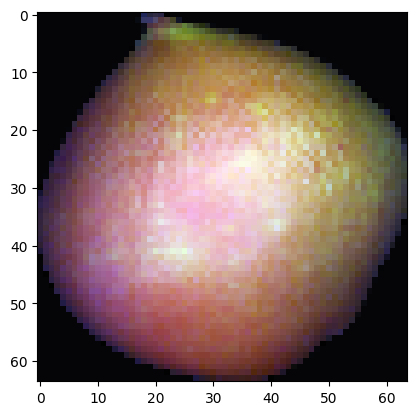

In [17]:
from spectral import imshow

imshow(img_12, bands=(150, 80, 30))

In [18]:
img_1

memmap([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

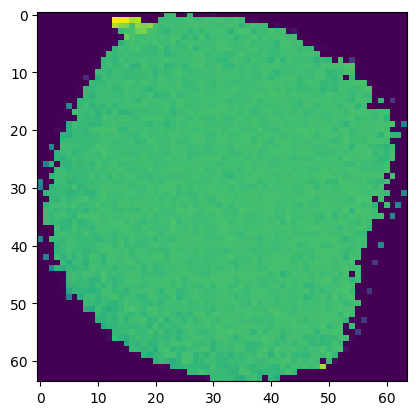

In [32]:
x1 = img_1
x1 = x1.argmax(2)
plt.imshow(x1)

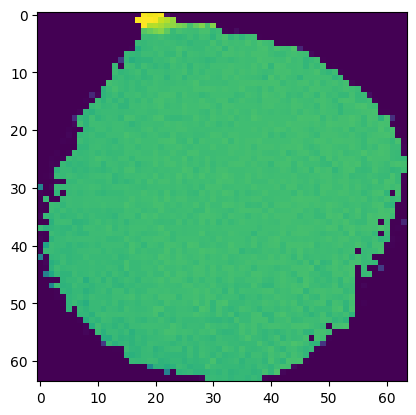

In [33]:
x2 = img_12.asarray()
x2 = x2.argmax(2)
plt.imshow(x2)

In [34]:
x1.mean(), x2.mean()

(np.float64(112.2666015625), np.float64(108.771484375))

In [35]:
import json

In [36]:
with open("train_only_labeled.json") as f:
    data = json.load(f)

In [37]:
set([el["ripeness_state"] for el in data["annotations"]])

{'overripe', 'perfect', 'unripe'}

In [38]:
data["annotations"]

[{'id': 0,
  'record_id': 0,
  'init_weight': 227,
  'end_weight': 227,
  'storage_days': 0,
  'firmness': 19750,
  'comment': None,
  'ripeness_state': 'unripe',
  'ripeness_state_fine': 'unripe'},
 {'id': 1,
  'record_id': 1,
  'init_weight': 227,
  'end_weight': 227,
  'storage_days': 0,
  'firmness': 19750,
  'comment': None,
  'ripeness_state': 'unripe',
  'ripeness_state_fine': 'unripe'},
 {'id': 2,
  'record_id': 2,
  'init_weight': 227,
  'end_weight': 227,
  'storage_days': 0,
  'firmness': 19750,
  'comment': None,
  'ripeness_state': 'unripe',
  'ripeness_state_fine': 'unripe'},
 {'id': 3,
  'record_id': 3,
  'init_weight': 227,
  'end_weight': 227,
  'storage_days': 0,
  'firmness': 19750,
  'comment': None,
  'ripeness_state': 'unripe',
  'ripeness_state_fine': 'unripe'},
 {'id': 4,
  'record_id': 4,
  'init_weight': 252,
  'end_weight': 252,
  'storage_days': 0,
  'firmness': 18250,
  'comment': None,
  'ripeness_state': 'unripe',
  'ripeness_state_fine': 'unripe'},
 {'id

In [39]:
wls = data["cameras"][0]["wavelengths"]

In [40]:
wls_x1 = [[wls[i] for i in r] for r in x1]
wls_x2 = [[wls[i] for i in r] for r in x2]

In [41]:
from collections import Counter

flat_wls_x1 = [item for sublist in wls_x1 for item in sublist]
flat_wls_x2 = [item for sublist in wls_x2 for item in sublist]

# Zliczanie wystąpień długości fal w wls_x1 i wls_x2
counter_x1 = Counter(flat_wls_x1)
counter_x2 = Counter(flat_wls_x2)

print("Licznik wystąpień w wls_x1:", counter_x1)
print("Licznik wystąpień w wls_x2:", counter_x2)

Licznik wystąpień w wls_x1: Counter({397.66: 968, 814.12: 488, 816.88: 452, 811.36: 446, 819.64: 362, 808.61: 246, 805.85: 165, 822.4: 141, 803.1: 124, 800.34: 120, 797.59: 108, 794.84: 103, 792.08: 72, 400.28: 54, 825.16: 47, 402.9: 38, 789.33: 38, 405.52: 19, 786.58: 13, 408.13: 10, 772.85: 8, 413.37: 5, 783.84: 5, 775.6: 4, 827.92: 4, 778.34: 3, 781.09: 3, 770.11: 3, 418.62: 2, 902.86: 2, 880.58: 2, 416.0: 2, 410.75: 2, 489.77: 2, 500.37: 2, 674.65: 2, 677.36: 2, 1003.81: 1, 986.9: 1, 992.54: 1, 925.19: 1, 927.98: 1, 936.38: 1, 891.71: 1, 886.15: 1, 866.69: 1, 431.74: 1, 858.37: 1, 833.45: 1, 471.26: 1, 682.79: 1, 669.23: 1, 680.07: 1, 655.69: 1, 652.99: 1, 671.94: 1, 658.4: 1, 661.1: 1, 495.07: 1, 666.52: 1, 753.66: 1, 663.81: 1, 759.14: 1, 505.67: 1, 421.24: 1, 916.81: 1})
Licznik wystąpień w wls_x2: Counter({397.66: 1082, 814.12: 444, 811.36: 361, 808.61: 350, 816.88: 333, 805.85: 234, 819.64: 227, 803.1: 179, 797.59: 177, 800.34: 170, 794.84: 122, 822.4: 105, 792.08: 65, 400.28:

In [42]:
all_wavelengths = sorted(set(flat_wls_x1 + flat_wls_x2))

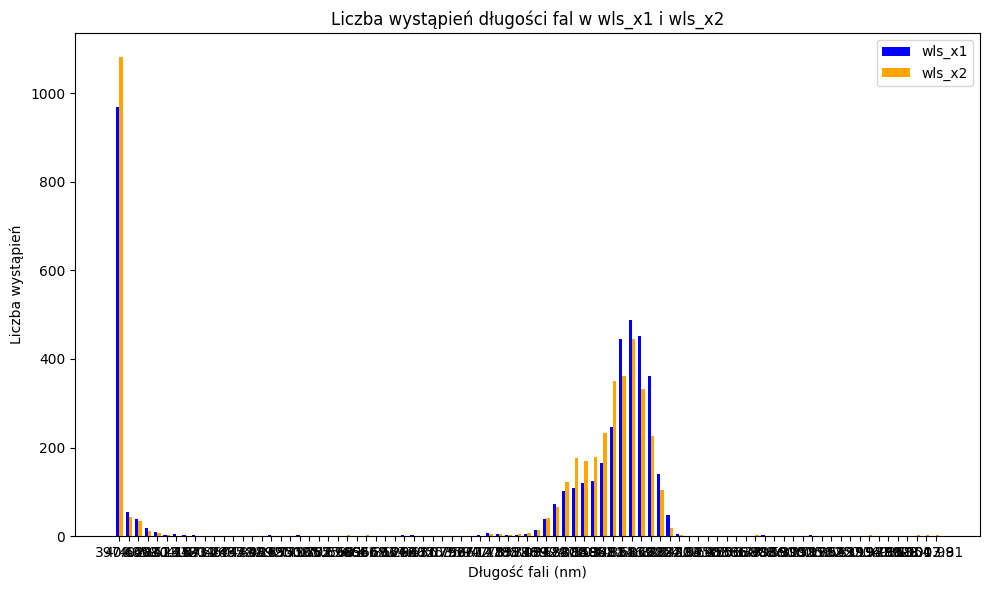

In [43]:
counts_x1 = [counter_x1[w] for w in all_wavelengths]
counts_x2 = [counter_x2[w] for w in all_wavelengths]

# Tworzenie wykresu kolumnowego
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(all_wavelengths))

# Rysowanie kolumn dla wls_x1 i wls_x2
bars1 = ax.bar(index, counts_x1, bar_width, label="wls_x1", color="blue")
bars2 = ax.bar(
    [i + bar_width for i in index], counts_x2, bar_width, label="wls_x2", color="orange"
)

# Etykiety i tytuły
ax.set_xlabel("Długość fali (nm)")
ax.set_ylabel("Liczba wystąpień")
ax.set_title("Liczba wystąpień długości fal w wls_x1 i wls_x2")
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(all_wavelengths)
ax.legend()

# Wyświetlenie wykresu
plt.tight_layout()
plt.show()